## Heart Disease

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

### Table of Content

* Importing the Relevant Libraries
* Importing the Dataset
* Data Inspection
* Exploratory Data Analysis
* Building Model
* Making a Prediction
* Comparison of the Prediction Models
* Predicting the Error

#### Regular EDS and plotting Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Importing Dataset

In [2]:
pwd()

'C:\\Users\\Debjit\\Desktop\\Decodr Data Science Course\\Projects\\Project 3 - Heart Disease'

#### Loading the dataset

In [19]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Detail and description of the DataFrame

In [10]:
df.shape

(304, 14)

In [20]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [21]:
# Counting the values
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [22]:
# Normalized value counts
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease Frequency according to Gender

In [27]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [31]:
df.sex.value_counts(normalize=True)

1    0.683168
0    0.316832
Name: sex, dtype: float64

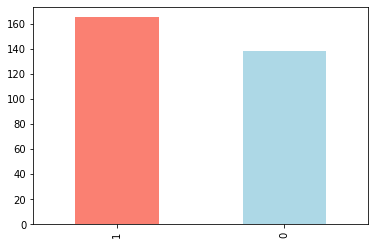

In [33]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

#### Data Cleaning

In [32]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [35]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


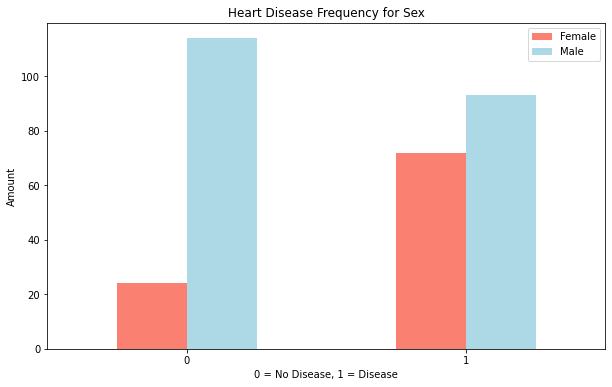

In [37]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); 

#### Age vs Max Heart rate for Heart Disease

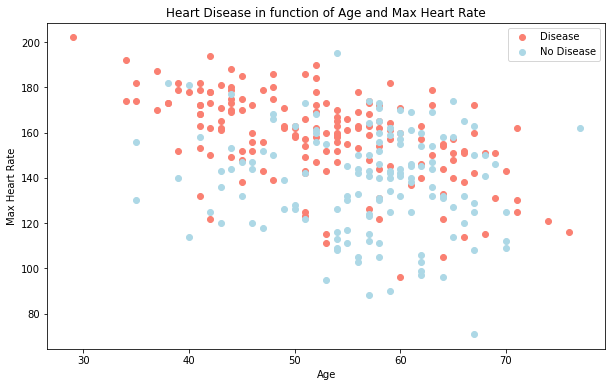

In [38]:
# Create another figure
plt.figure(figsize=(10,6))

# For positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# For negative examples,
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

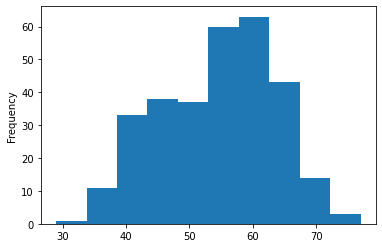

In [39]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

#### Heart Disease Frequency per Chest Pain Type

In [41]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


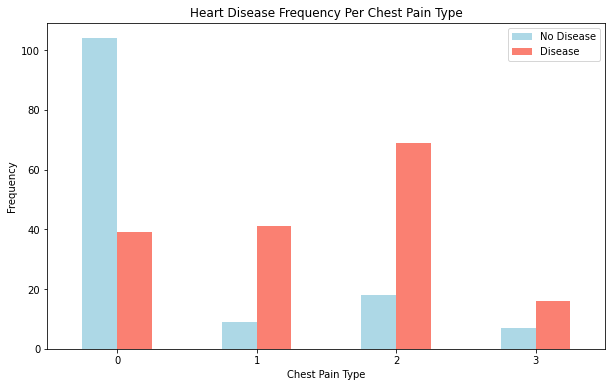

In [42]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);


#### Correlation between independent variables

In [43]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


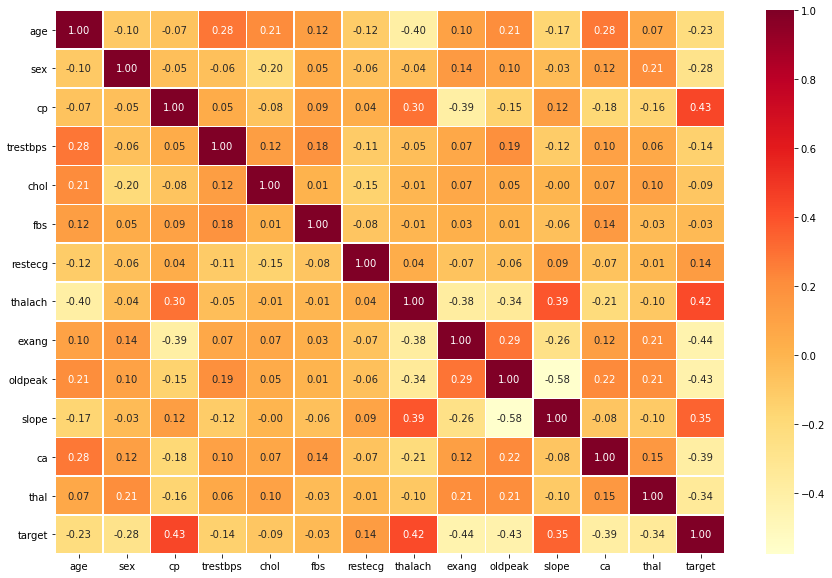

In [45]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlOrRd");

#### Modeling

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
df.reset_index(inplace=True)

In [62]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df["target"]

In [63]:
# Independent variables (no target column)
X.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [56]:
X.drop('index', axis=1, inplace=True)

In [64]:
# Targets
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#### Splitting the data into Train & Test

In [65]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2) 

In [66]:
X_train

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [67]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [68]:
X_test

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [69]:
y_test, len(y_test)

(179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64,
 61)

#### Model choices

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [93]:
# Loading Linear Regression
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fitting the model
LR_model.fit(X_train, y_train)

#predict
LR_predicted_y_test  = LR_model.predict(X_test)

#actual
LR_actual_y_test = y_test

In [77]:
LR_predicted_y_test

array([ 0.36485493,  0.21176824,  0.7572438 , -0.10274611,  1.02565822,
        1.20682271,  0.69664041, -0.22417875, -0.24860794,  1.03488439,
        1.30253283,  0.44474931,  1.09950977,  0.2232091 ,  0.95466677,
        1.06028233,  0.87182793,  0.34347697, -0.2003184 , -0.29376766,
        0.50985805, -0.26394191,  0.11533072,  1.20796452,  0.81808345,
        0.05447389,  0.22738638,  0.7848249 , -0.03362214,  0.84059478,
        0.53031472, -0.26835602,  0.17306822,  0.74242683,  1.19706877,
        0.29448505,  0.69938782,  0.89982896,  1.05132605,  0.95176727,
        0.92859526,  0.9163393 ,  0.60737306,  0.63771358,  1.2238227 ,
       -0.11116734,  0.06288881,  0.9439208 , -0.24050868, -0.02603386,
        0.0569558 , -0.07565795,  1.14634549,  1.0847368 ,  0.10193975,
       -0.12198513, -0.04582068,  0.94265351, -0.34725554, -0.01015667,
        0.16861119])

In [80]:
LR_actual_y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### K-Nearest Neighbors Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [82]:
# Loading K-Nearest Neighbors
KNN_model = KNC(n_neighbors = 3)

# Fitting the model
KNN_model.fit(X_train, y_train)

#predict
KNN_predicted_y_test  = KNN_model.predict(X_test)

#actual
KNN_actual_y_test = y_test

In [83]:
KNN_predicted_y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
KNN_actual_y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### RandomForest Classification

In [85]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [86]:
#create a model
RF_model = RFC(n_estimators= 250,max_depth= 1)

#model fitting
RF_model.fit(X_train, y_train)

#prediction 
RF_predicted_y_test = RF_model.predict(X_test)

#actual
RF_actual_y_test = y_test

In [87]:
RF_predicted_y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [88]:
RF_actual_y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### Model Comparison

In [133]:
print ( 'Logistic Regression:',LR_model.score(X_train,y_train),
        'K-Nearest Neighbor:',KNN_model.score(X_train,y_train),
        'Random Forest Classifier:',RF_model.score(X_train,y_train),sep="\n")

Logistic Regression:
1.0
K-Nearest Neighbor:
0.9958677685950413
Random Forest Classifier:
0.9710743801652892


<Figure size 1440x1296 with 0 Axes>

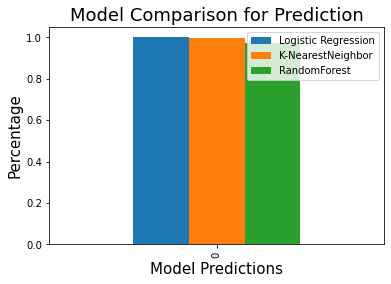

In [146]:
A = (LR_model.score(X_train,y_train),KNN_model.score(X_train, y_train),RF_model.score(X_train,y_train))
B = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
model_scores =(A)
model_compare = pd.DataFrame(model_scores)
plt.figure(figsize=(20, 18))
model_compare.T.plot.bar();
plt.xlabel("Model Predictions", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Model Comparison for Prediction", size=18)
plt.legend(["Logistic Regression","K-NearestNeighbor","RandomForest"]);

### RMSE

In [151]:
from sklearn import metrics
MSE1= metrics.mean_squared_error(y_test,LR_predicted_y_test)
from math import sqrt
rmse1 = sqrt(MSE1)
print("Root Mean Squared Error for Logistic Regression:",rmse1)

Root Mean Squared Error for Logistic Regression: 0.0


In [149]:
MSE2= metrics.mean_squared_error(y_test,KNN_predicted_y_test)
rmse2 = sqrt(MSE2)
print("Root Mean Squared Error for K-NearestNeighbor Classifier:",rmse2)

Root Mean Squared Error for K-NearestNeighbor Classifier: 0.0


In [152]:
MSE3= metrics.mean_squared_error(y_test,RF_predicted_y_test)
rmse3 = sqrt(MSE3)
print("Root Mean Squared Error for Random Forest Classifier:",rmse3)

Root Mean Squared Error for Random Forest Classifier: 0.18107149208503706
